
# Project: No-show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, we will be investigating the dataset No-show Medical Appointments. It collects information from over 110K medical appointments in Brazil and the focus is on the question of whether or not patients show up for their appointments. There are 14 variables in the dataset providing distinct characteristics. For this analysis, No-show is the dependent variable whilst the rest are the independent variables.

### Columns Description

1. **PatientId** - Unique identification of a patient

2. **AppointmentID** - Unique identification of each appointment

3. **Gender** - Identify sex of patient as Male or Female

4. **AppointmentDay** - Expected day of a patient's visit

5. **ScheduledDay** - The day the appointment was booked

6. **Age** - How old a patient is

7. **Neighbourhood** - Indicates the location of the hospital

8. **Scholarship** - Indicates whether or not a patient is enrolled in the [Brazilian welfare program](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&source=editors&ust=1653541910533308&usg=AOvVaw082fwJS3LUbHzZR9UQ8eyR)

9. **Hipertension** - True or False, indicates whether a patient is hipertensive or not

10. **Diabetes** - True or False, indicates whether a patient is diabetic or not

11. **Alcoholism** - True or False, indicates whether a patient is into alcoholism

12. **Handcap** - True or False

13. **SMS_recieved** - Indicates whether a patient received sms or not

14. **No-show** - Yes or No, indicates whether a patient show up or not.

> **dataset source** [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True) 


### Question(s) for Analysis

1. Does any relationship exist between age and showing up?
2. Does prolonged waiting period (time between scheduled day and appointment day) affect patient showing up?
3. Do patients with scholarship show up more for appointment?


In [1]:
# importing all project-dependent packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

### Custom Funtion Definition

In [2]:
def calculateProportion(df, column):
    """Calculates the proportion of column in a data frame"""
    
    # total number of patients in each age group
    totals_of_each_group = df.groupby(column)['No-show'].count() 
    
    # total number of patients in each age group based on whether they show or did not show up
    show_noshow_count = df.groupby([column, 'No-show'])['No-show'].count() 
    
    # find the proportions 
    proportions = show_noshow_count / totals_of_each_group
    
    return proportions 


def plotProportionsBarChart(proportions, xlabel, title, figsize=(8, 6)):
    """Plot bar chart for proportions"""
    
    proportions.unstack().plot(kind='bar', figsize=figsize);
    plt.title(title, fontweight='bold') ;
    plt.ylabel('Average Number of Patients', fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.legend(labels=['Show', 'No Show'], bbox_to_anchor=(1.05, 0.6));
    plt.xticks(rotation=0);
    

<a id='wrangling'></a>
## Data Wrangling

Let's build intuition about the dataset by understanding the structure, datatypes, number of entries, etc. This is typically done by loading in the dataset, check for cleanliness, and then trim and clean the data. The steps include:

1. Load (gather) the data,
2. Assess the data and
3. Clean the data


### Loading the data

In [3]:
# Loading the dataset 
path = "Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv"
noshow_df = pd.read_csv(path)
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assessing the data 
Here we will poke into the data to understand its structure, datatypes, number of columns, number of entries, view statistics, etc. 

In [4]:
# checking number of rows and columns
noshow_df.shape

(110527, 14)

+ There are **110527 rows** and **14 columns** in the dataset

In [5]:
# checking for column datatypes to identify if some columns have wrong datatypes
noshow_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

+ ScheduledDay and AppointmentDay should be **datatimes** instead of **string**

In [6]:
# checking for empty values
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


+ There are no empty values in the dataset.

In [7]:
# checking for number of unique values
noshow_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

+ Number of patient IDs less than number of appointment IDs means that some patients made more than one appointment.
+ 5 values for Handcap column instead of 2 (i.e. 0 and 1) needs to be corrected 

In [8]:
# viewing summary statistics
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


+ Mean age of patients is 37 whilst the oldest patient is 115.
+ Some ages are less than 0 which is quiet strange.
+ Less than half of the total sms sent were received.

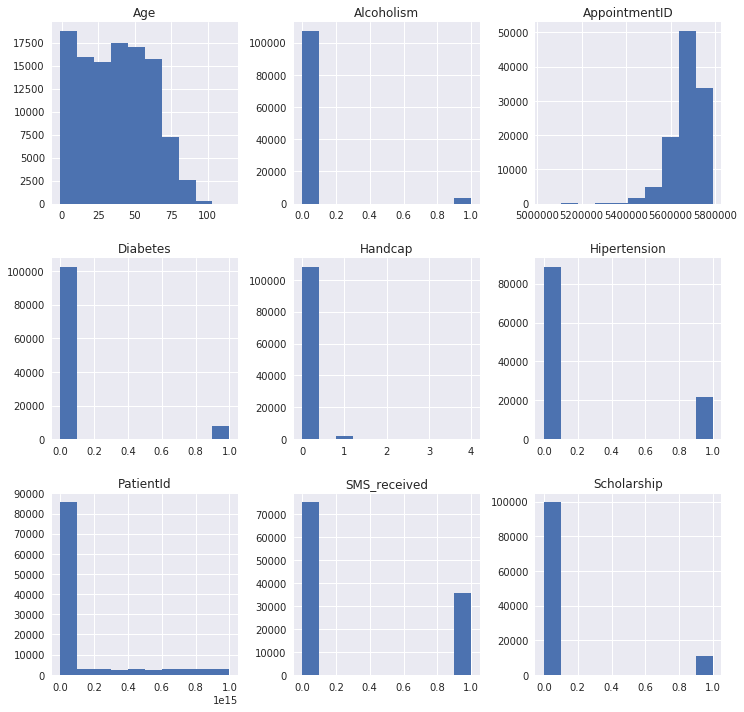

In [9]:
# showing histogram for the whole dataset 
noshow_df.hist(figsize=(12,12));

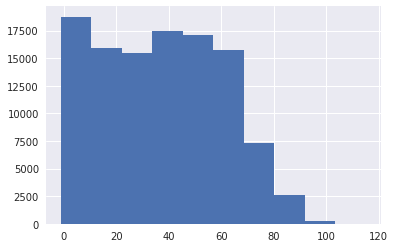

In [10]:
# checking for age distribution
noshow_df['Age'].hist();

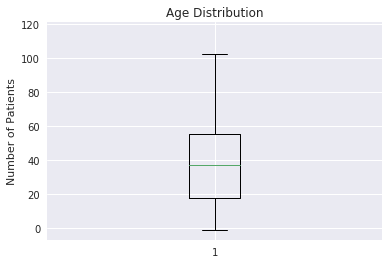

In [11]:
# checking the age column
fig, ax = plt.subplots()
ax.boxplot(noshow_df['Age']);
ax.set_title('Age Distribution');
ax.set_ylabel('Number of Patients');

+ There is an outlier when age in more than 100 years.

In [11]:
# checking for gender 
noshow_df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

+ There are more females than males who scheduled appointment.

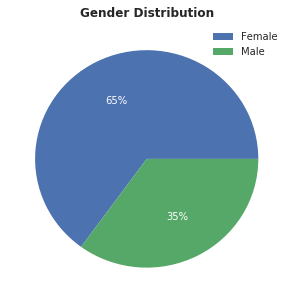

In [12]:
# checking gender 
gender = noshow_df['Gender'].value_counts().values
fig = plt.figure(figsize=(5,5))
plt.pie(gender, labels=['Female', 'Male'], textprops={"color":"w"}, autopct='%.0f%%');
plt.legend()
plt.title("Gender Distribution", fontweight='bold')
plt.show()

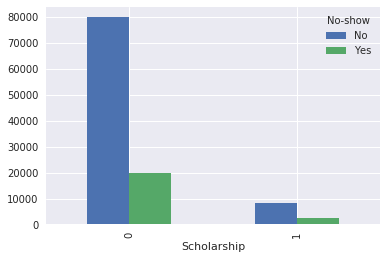

In [13]:
# checking scholarship column
scholarship = noshow_df.groupby('Scholarship')['No-show'].value_counts().unstack()
scholarship.plot(kind='bar');


+ Patients without scholarship show up for appointment more than those with scholarship


### Data Cleaning

From the above assessments the following cleaning are necessary:
+ Columns such as **PatientId**, **AppointmentID**, **Hipertension**, **Alcoholism**, **Diabetes** etc. that are not relevant for our **research questions will be dropped**.
+ Negative age must be **dropped**
+ ScheduledDay and AppointmentDay datatypes must be changed from **string** to **datetimes** 
+ Add some new columns to the dataset 


+ Droping **irrelevant columns** for our research questions

In [14]:
columns_to_drop = ['PatientId', 'AppointmentID', 'Hipertension', 'Alcoholism', 'Diabetes']
noshow_df.drop(columns_to_drop, axis=1, inplace=True)
noshow_df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,No


+ Cleaning **Age** column

In [15]:
# Checking for ages below 0 
negative_age = noshow_df.query('Age < 0')
negative_age

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,No


In [16]:
# dropping the negative age
noshow_df.drop(negative_age.index, inplace=True)
noshow_df.query('Age < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Handcap,SMS_received,No-show


+ Negative age dropped successfully

In [17]:
# grouping the ages
bins = [0, 2, 4, 13, 35, 60, noshow_df['Age'].max()] # this is to the group ages from 0 to 102
labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Youth', 'Adult']
age_group = pd.cut(noshow_df['Age'], bins=bins, labels=labels, right=False)
noshow_df.insert(loc=4, column='AgeGroup', value=age_group)
noshow_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,AgeGroup,Neighbourhood,Scholarship,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,Adult,JARDIM DA PENHA,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,Youth,JARDIM DA PENHA,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,Adult,MATA DA PRAIA,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,Kids,PONTAL DE CAMBURI,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,Youth,JARDIM DA PENHA,0,0,0,No


In [18]:
# veiwing the age categories 
noshow_df.groupby('AgeGroup')['No-show'].value_counts().unstack()

No-show,No,Yes
AgeGroup,,
Infants,4758,1054
Toddlers,2602,529
Kids,9369,2724
Teens,23085,7504
Youth,30462,7266
Adult,17929,3239


In [19]:
# Dealing with outlier in the age column
q1 = noshow_df['Age'].quantile(0.25)
q3 = noshow_df['Age'].quantile(0.75)
iqr = q3 - q1
age_upper_limit = q3 + 1.5 * iqr
age_upper_limit

110.5

+ We will ignore all ages greater than the upper limit because they are outliers

In [20]:
# Removing ages above the upper limit

noshow_df = noshow_df.query(f'Age >= 0 & Age <= {age_upper_limit}')
noshow_df.query(f'Age > {age_upper_limit}')

,Gender,ScheduledDay,AppointmentDay,Age,AgeGroup,Neighbourhood,Scholarship,Handcap,SMS_received,No-show


 + Cleaning the  **ScheduledDay** and  **AppointmentDay** columns

In [21]:
# changing scheduled day and appointment day columns to datetime

noshow_df['ScheduledDay'] = pd.to_datetime(noshow_df['ScheduledDay'])
noshow_df['AppointmentDay'] = pd.to_datetime(noshow_df['AppointmentDay'])
noshow_df[['ScheduledDay', 'AppointmentDay']].dtypes

ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
dtype: object

+ data types changed successfully

In [24]:
# computing waiting days after appointment is scheduled 
waiting_days = noshow_df['AppointmentDay'].dt.date - noshow_df['ScheduledDay'].dt.date
waiting_days = waiting_days.dt.days

# inserting waiting days column into the dataset
noshow_df.insert(loc=3, column='WaitingDays', value= waiting_days)
noshow_df.head()

,Gender,ScheduledDay,AppointmentDay,WaitingDays,Age,AgeGroup,Neighbourhood,Scholarship,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,0,62,Adult,JARDIM DA PENHA,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,0,56,Youth,JARDIM DA PENHA,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,0,62,Adult,MATA DA PRAIA,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,0,8,Kids,PONTAL DE CAMBURI,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,0,56,Youth,JARDIM DA PENHA,0,0,0,No


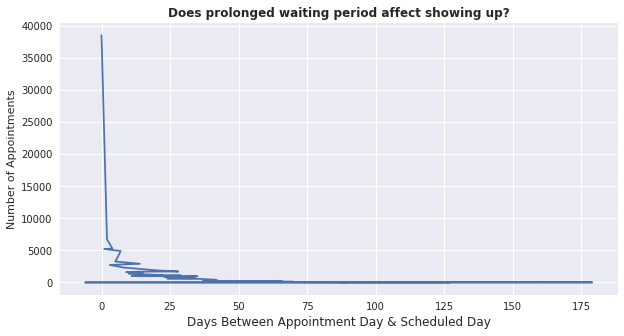

In [25]:
# visualizing the waiting days
noshow_df['WaitingDays'].value_counts().plot(figsize=(10, 5))
plt.title('Does prolonged waiting period affect showing up?', fontweight='bold');
plt.xlabel('Days Between Appointment Day & Scheduled Day', fontsize=12);
plt.ylabel('Number of Appointments');
plt.xticks(rotation=0);

+ Negative waiting days means there were some appointments made before they were scheduled. This anomaly should be corrected by filtering out all such entries from the dataset.

In [26]:
noshow_df = noshow_df.query('WaitingDays >= 0')

+ Let's verify the dataset by visualizing it again

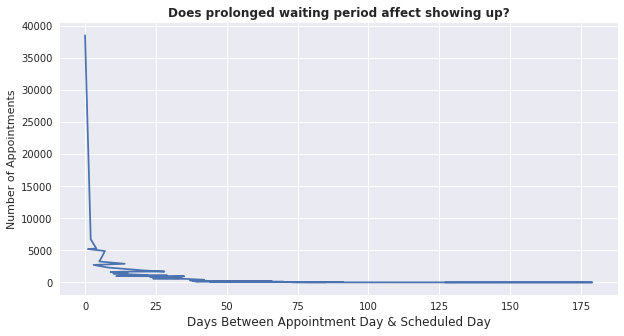

In [27]:
# visualizing the waiting days
noshow_df['WaitingDays'].value_counts().plot(figsize=(10, 5))
plt.title('Does prolonged waiting period affect showing up?', fontweight='bold');
plt.xlabel('Days Between Appointment Day & Scheduled Day', fontsize=12);
plt.ylabel('Number of Appointments');
plt.xticks(rotation=0);

<a id='eda'></a>
## Exploratory Data Analysis

### Does any relationship exist between age and showing up?

+ Now let's begin by plotting the age groupings

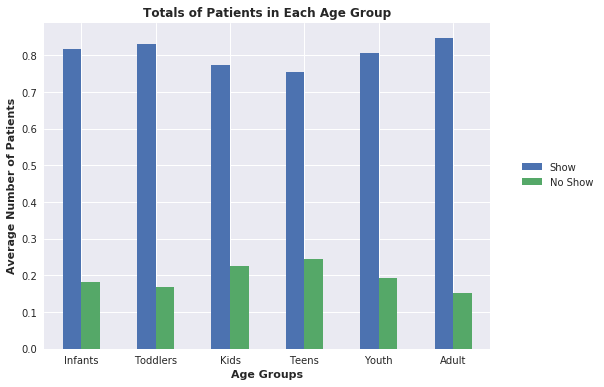

In [28]:
# plotting total number of patients in each age group
prop = calculateProportion(noshow_df, 'AgeGroup')

plotProportionsBarChart(proportions=prop, 
                        xlabel='Age Groups',  
                        title='Totals of Patients in Each Age Group')

+ From the above plot we see that **Youths** constitute the **highest** number of patients. Hence for our analysis to be tentative, we will make use of proportion of the age groups 

+ **Observations:**  

Showing up in decreasing order is: **Adult** > **Toddlers** > **Infants** > **Youth** > **Kids** > **Teens**  
Not showing up in decreasing order is: **Teens** > **Kids** > **Youth** > **Infants** > **Toddlers** > **Adults**

+ **Hence a relationship exist between showing up and age**

### Does prolonged waiting period (time between scheduled day and appointment day) affect patient showing up?

+ We will assume that the normal waiting days for an appointment is 10 days

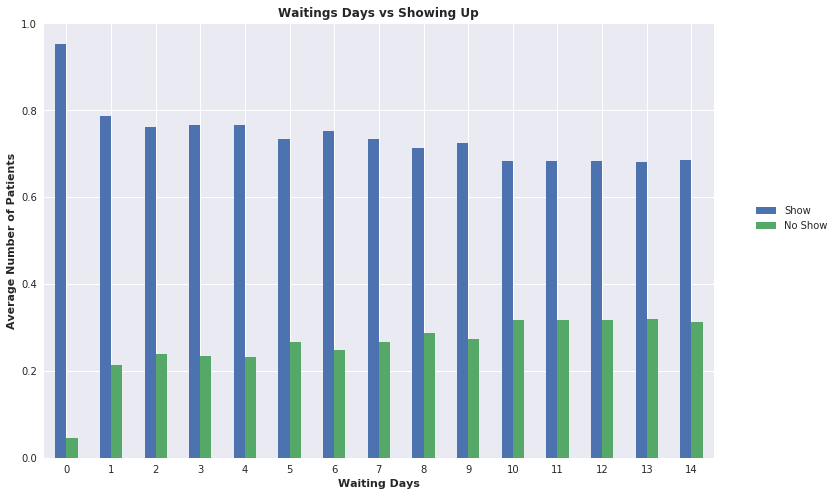

In [29]:
waiting_df = noshow_df.query('WaitingDays <= 14')
proportions= calculateProportion(waiting_df, 'WaitingDays')
plotProportionsBarChart(proportions, xlabel='Waiting Days', title='Waitings Days vs Showing Up', figsize=(12, 8))

 **Observations**
* More patients showed up for appointment on the sechedule day without waiting
* As waiting days are prolonged, patients who show up for appointment dropped sharply

**Prolonged waiting days negatively affects showing up because as waiting days increase, patients showing up for appointment decrease**

### Do patients with scholarship show up more for appointment?

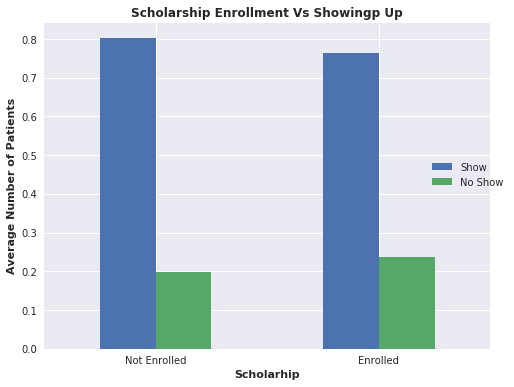

In [30]:
proportions = calculateProportion(noshow_df, 'Scholarship')
plotProportionsBarChart(proportions, xlabel='Scholarhip', title='Scholarship Enrollment Vs Showingp Up')
plt.xticks([0, 1], ['Not Enrolled', 'Enrolled'], rotation=0);

**Observation**
* People not enrolled in the scholarship showed up more for appointments than people enrolled.

<a id='conclusions'></a>
## Conclusions

+ Age groups; Adults, toddlers and youths show up the most for appointment while Kids and Teens ususally miss their appointment.
+ Increase in waiting days leads to decrease in showing up.
+ People without scholarship showed up for appointment more than those enrolled it. 

### Limitation
+ Regular waiting period for an appointment was assumed as 14 days.

### References
+ [stackoverflow.com](https://stackoverflow.com/)
+ [geekforgeeks.com](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/)
+ [kaggle.com](https://www.kaggle.com/code/mohamedhassan1911/why-do-30-of-patients-miss-their-appointments/notebook)
+ [pandas.pydata.org](https://pandas.pydata.org/)

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0